In [ ]:
import os
os.chdir('/content/drive/MyDrive/DataScienceProject')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Packages.QC import QC
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_tr = pd.read_csv('Model ready data/x_train.csv')
x_te = pd.read_csv('Model ready data/x_test.csv')
y_tr = pd.read_csv('Model ready data/y_train.csv')
y_te = pd.read_csv('Model ready data/y_test.csv')

#Grid search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor(n_jobs=-1,random_state=10)
rf.fit(x_tr,y_tr.values.ravel())
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

##Grid search params

In [ ]:
rf_grid = GridSearchCV(rf,{'bootstrap':[True,False],'criterion':['squared_error','friedman_mse'],'max_features':['auto','sqrt'],'n_estimators':range(90,151,10)},cv=5)
rf_grid.fit(x_tr,y_tr.values.ravel())
print(f'Best parameters from grid search: {rf_grid.best_params_}, based on best score: {rf_grid.best_score_}')

Best parameters from grid search: {'bootstrap': True, 'criterion': 'squared_error', 'max_features': 'auto', 'n_estimators': 110}, based on best score: 0.9872783596886215


In [ ]:
yrf_tr_pred = rf_grid.predict(x_tr)
yrf_te_pred = rf_grid.predict(x_te)
print(f'Mean squared error for best params:\nTraining = {mean_squared_error(y_tr,yrf_tr_pred)*100:.5f}%\tTesting = {mean_squared_error(y_te,yrf_te_pred)*100:.5f}%')
print(f'R-2 score:\nTraining = {r2_score(y_tr,yrf_tr_pred)*100:.5f}%\tTesting = {r2_score(y_te,yrf_te_pred)*100:.5f}%')
print(f'Adjusted R-2 score:\nTraining = {(1 - (1-r2_score(y_tr,yrf_tr_pred))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1))*100:.5f}%\tTesting = {(1 - (1-r2_score(y_te,yrf_te_pred))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1))*100:.5f}%')

Mean squared error for best params:
Training = 0.12763%	Testing = 1.15746%
R-2 score:
Training = 99.82924%	Testing = 98.13093%
Adjusted R-2 score:
Training = 99.82573%	Testing = 97.96532%


#Plot

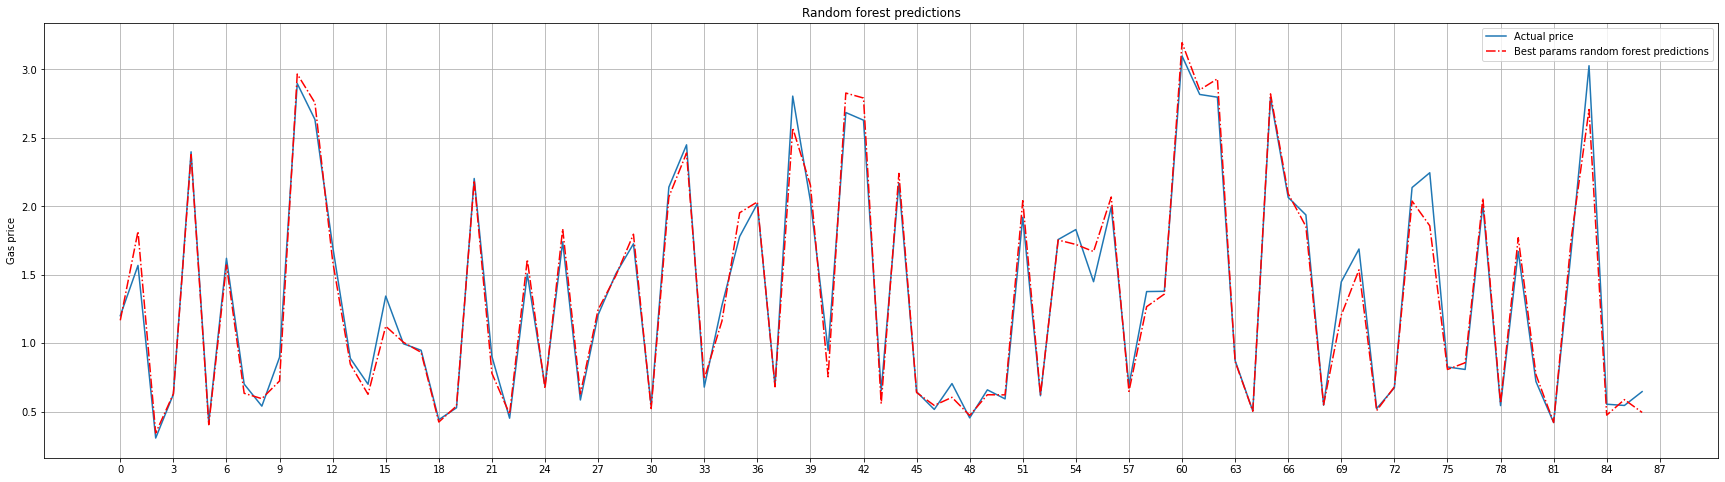

In [ ]:
ax = y_te.plot(figsize=(30,8))
plt.title('Random forest predictions')
pd.DataFrame(yrf_te_pred).plot(ls='-.',color='r',ax=ax,grid=True)
plt.xticks(np.arange(0,len(y_te)+1,3))
plt.ylabel('Gas price')
plt.legend(['Actual price','Best params random forest predictions'])
plt.savefig('Results/Model outcomes/3.Random forest predictions.png')
plt.show()